# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
#importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#Carregando a base de dados
df=pd.read_csv('df_dummy.csv')
df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0


In [3]:
#Verificando o tipo das variáveis
df.dtypes

Unnamed: 0                                  int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [4]:
#Convertendo a variável categórica em variável numérica/binária através da criação de variável dummy
df_dummy= pd.get_dummies(df,columns = ['mau'],drop_first= True)
df_dummy.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau_True
0,0,0,58.832877,3.106849,1,0,0,0,2.0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,0,0,1,0,1,0,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,0,...,0,0,1,0,1,0,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,1,...,1,0,0,0,1,0,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,0,...,1,0,0,0,1,0,0,0,0,0


In [5]:
#Verificando existência de 'missings'
df_dummy.isna().sum()

Unnamed: 0                                0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a 
variável resposta mau e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies)


In [6]:
# Separando as variáveis explicativas da target
y= df_dummy.mau_True

In [7]:
# Separando as variáveis explicativas da target

X=df_dummy.drop('mau_True', axis = 1) 

In [8]:
#Árvore de classificação c/ todas as variáveis

clf= DecisionTreeClassifier(random_state= 100)
clf

DecisionTreeClassifier(random_state=100)

In [9]:
X

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,1,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,0,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0


In [10]:
#Construindo a árvore com todas as colunas

clf = clf.fit(X,y)

clf

DecisionTreeClassifier(random_state=100)

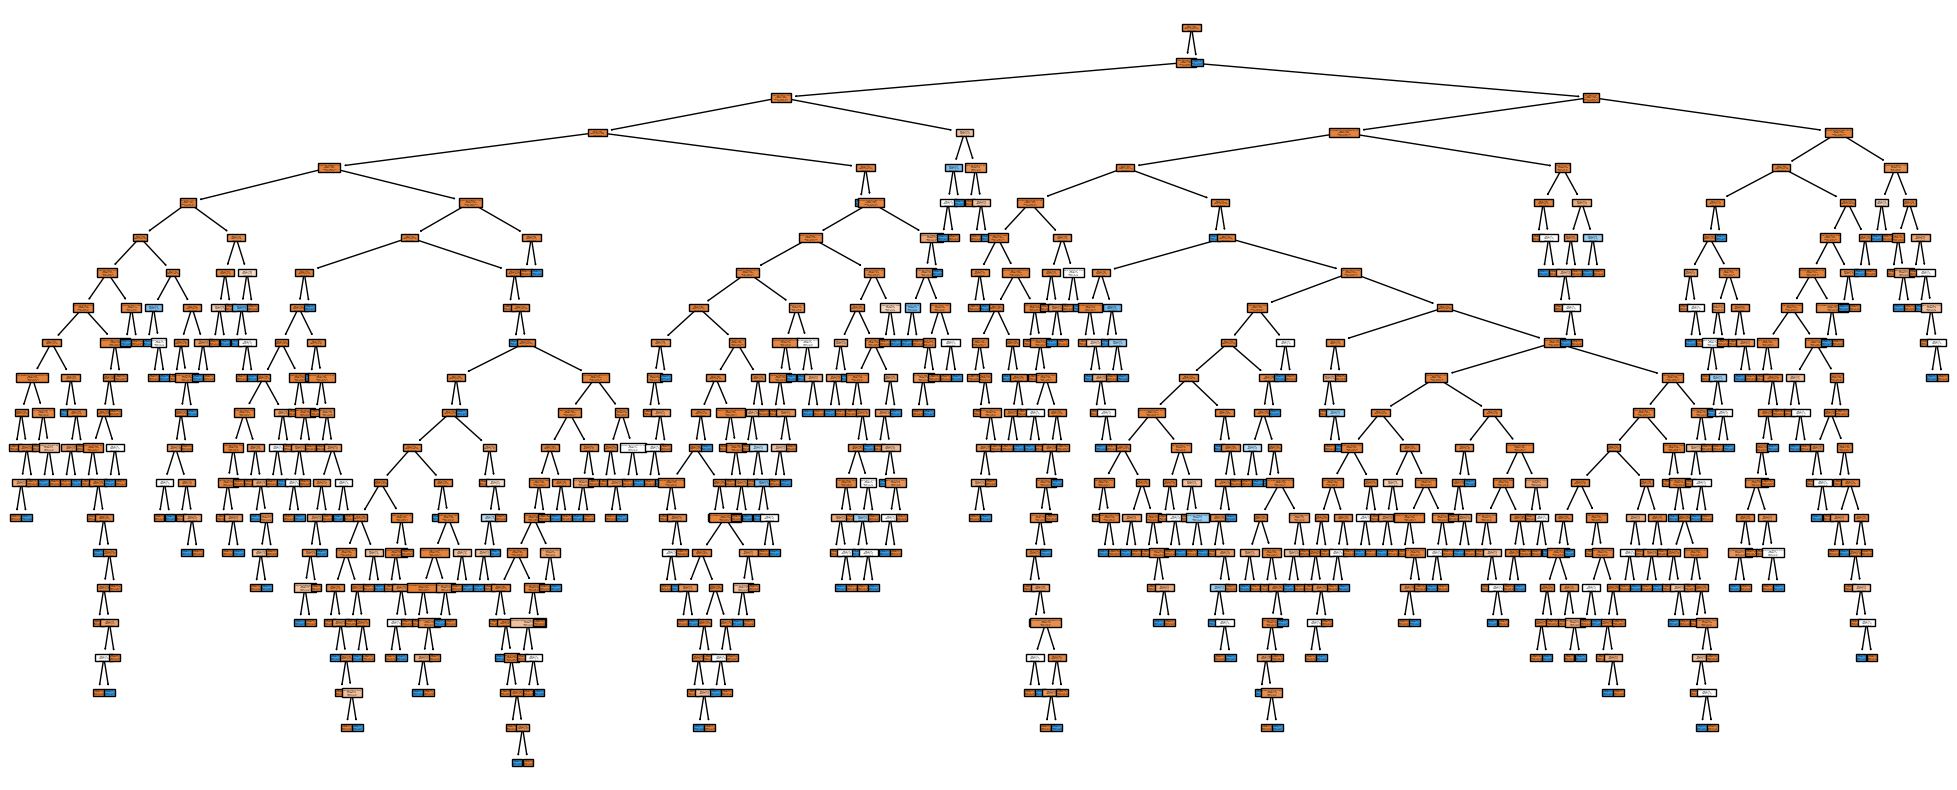

In [11]:
#Imprimindo a árvore de decisão
plt.figure (figsize = (25,10))
plot_tree (clf,
          filled = True,
          class_names = ['Bom','Mau'],
          feature_names=X.columns);

In [12]:
#Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100) 

In [13]:
clf = DecisionTreeClassifier(random_state = 100) 
clf = clf.fit(X_train, y_train) 

In [14]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste



array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
#Definindo um objeto com a função da árvore de decisão.
X[['tempo_emprego']]

,tempo_emprego
0,3.106849
1,8.358904
2,8.358904
3,2.106849
4,3.021918
...,...
16645,9.884932
16646,7.380822
16647,9.800000
16648,9.800000


In [16]:
#Criando objeto clf
clf = DecisionTreeClassifier(random_state = 100)
clf

DecisionTreeClassifier(random_state=100)

In [17]:
#Treinando modelo com a variável de treinamento.
clf = clf.fit(X_train , y_train)

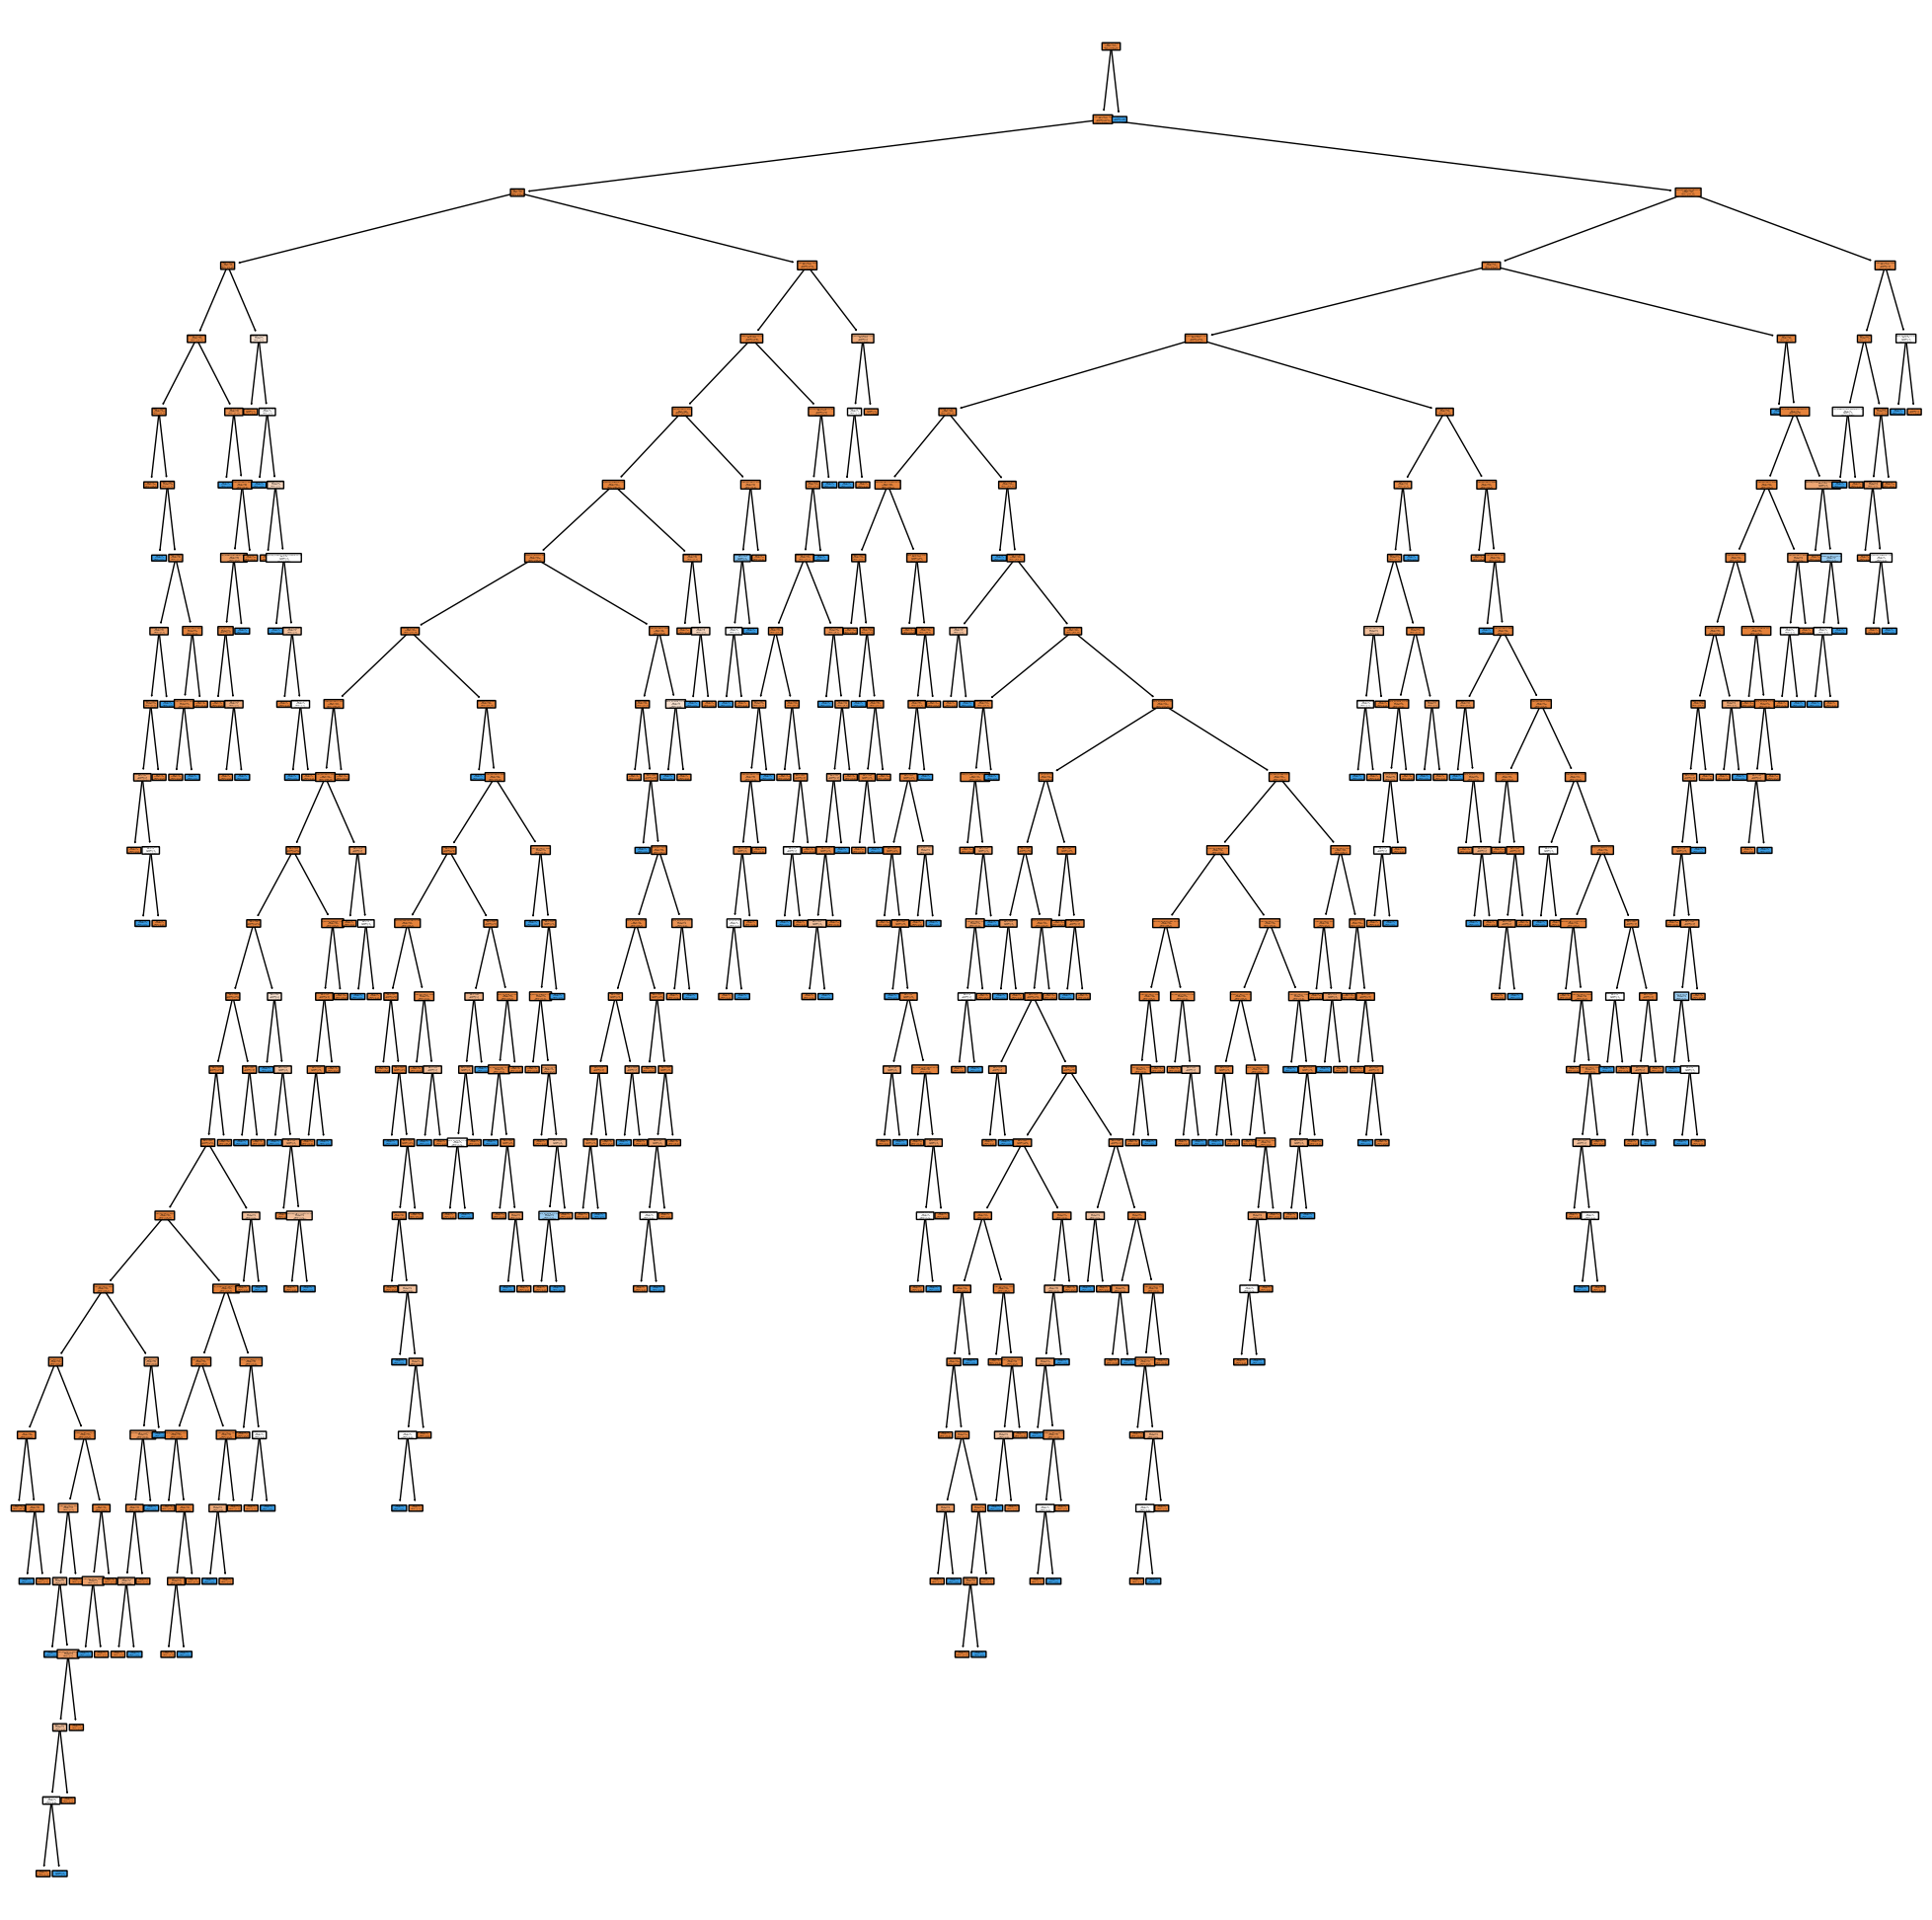

In [18]:
#Plotando a árvore de decisão da base de treino.
plt.figure(figsize=[25, 25])
plot_tree(clf,
          filled=True,
          rounded = True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names= X.columns);

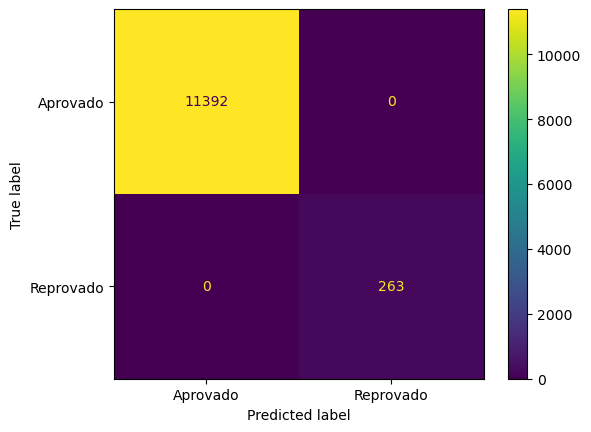

In [19]:
#Matriz da confusão da base de treino
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()

In [20]:
#Calculo da acurácia na base de treinamento.
clf = DecisionTreeClassifier(random_state = 100)

path = clf.cost_complexity_pruning_path (X_train,y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf.fit (X_train, y_train)
    clfs.append (clf)

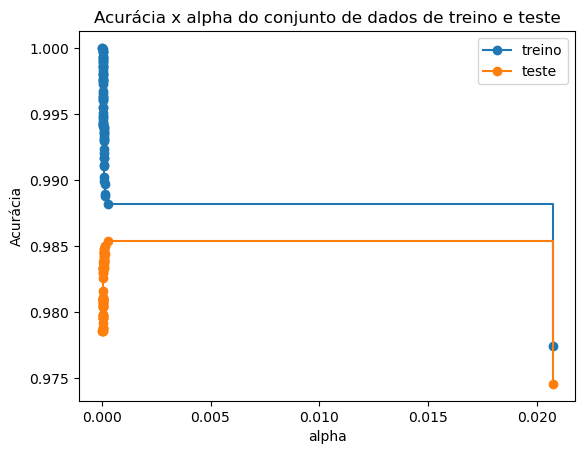

In [22]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [23]:
#Fazendo previsões usando aprendizado de máquinas treinado.
predict = clf.predict(X)

In [24]:
#Calculando a acurácia
accuracy_score(y,predict)

0.9765765765765766

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [25]:
#1.Classifique a base de teste de acordo com a árvore que você treinou no item 2.

#Treinando modelo com a variável de teste.
clf2 = clf.fit(X_test , y_test)

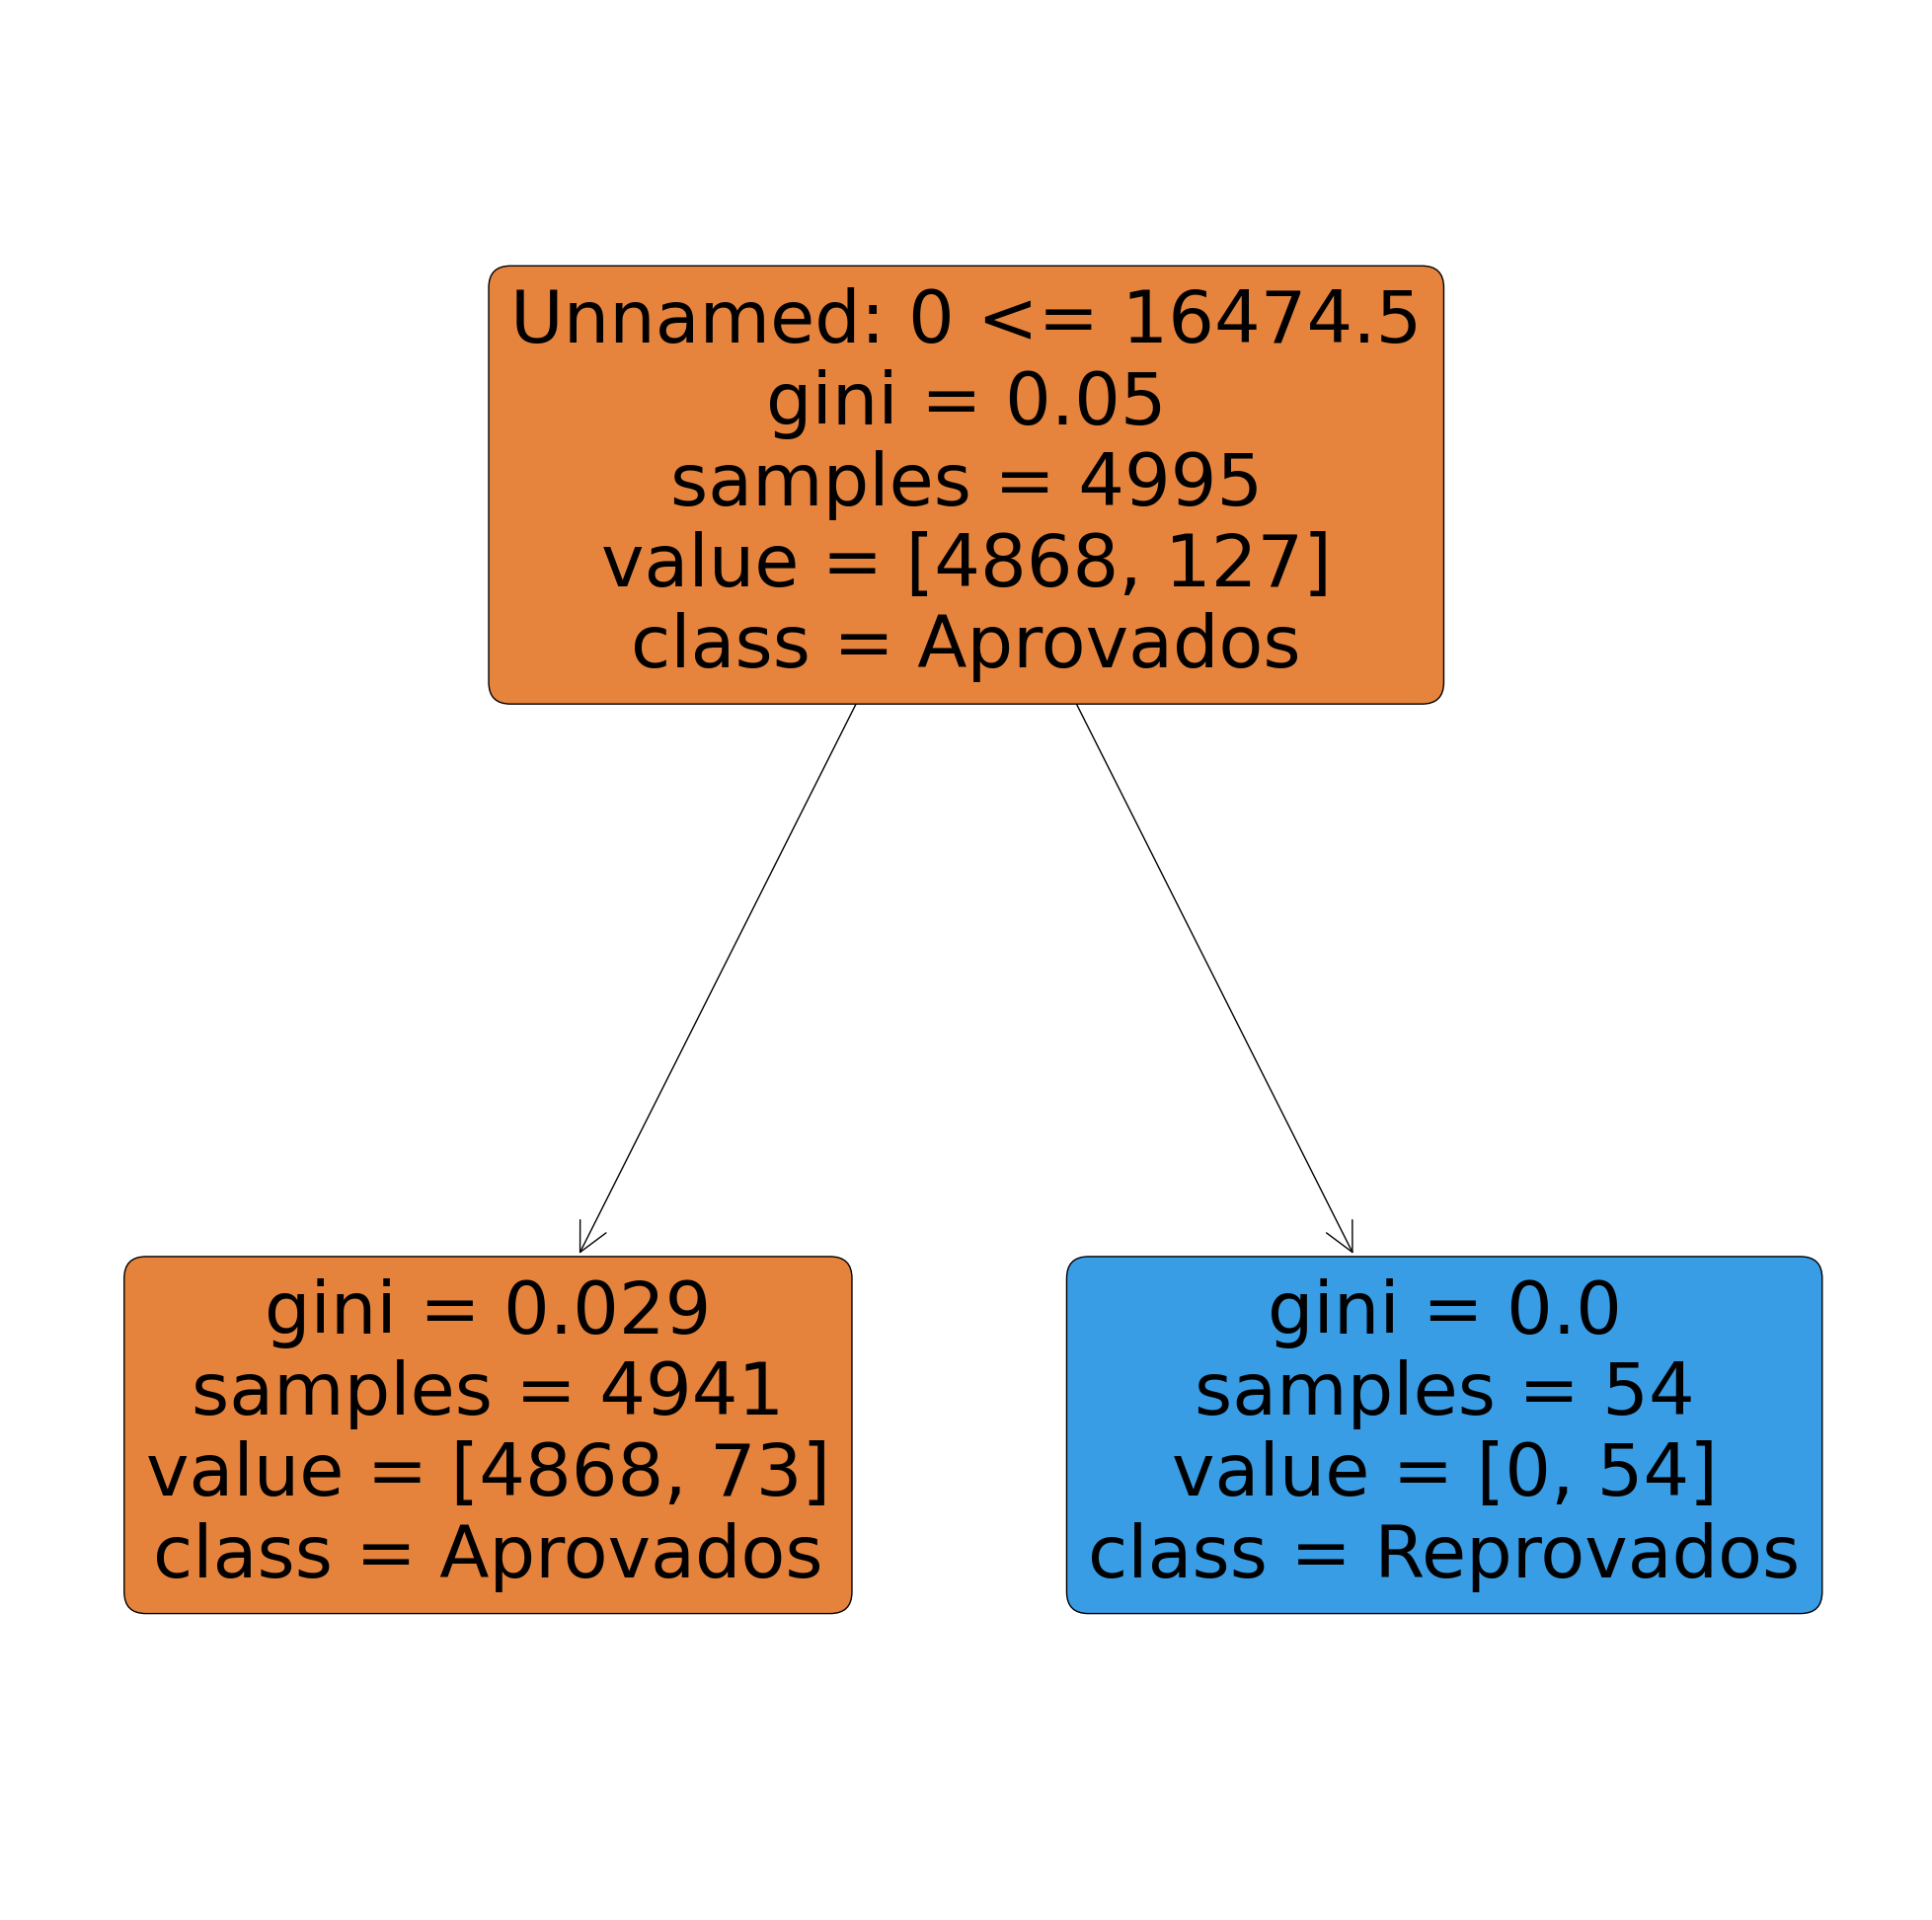

In [26]:
#Plotando a árvore de decisão da base de teste.
plt.figure(figsize=[25, 25])
plot_tree(clf2,
          filled=True,
          rounded = True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names= X.columns);

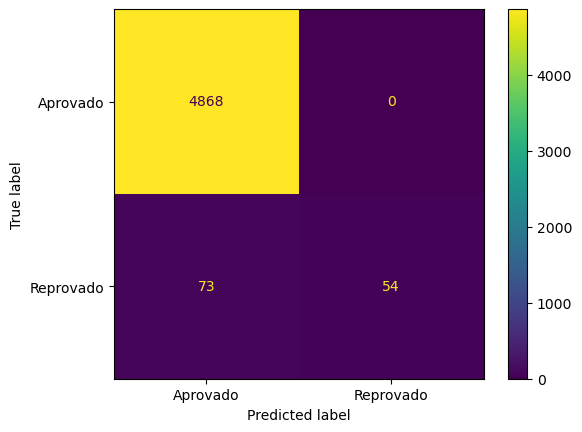

In [27]:
# 2.Produza a visualização da matriz de confusão para a base de teste.

#Matriz da confusão da base de teste.
predictions = clf2.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()

In [28]:
# 3.Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

#Calculo da acurácia na base de teste.
clf2 = DecisionTreeClassifier(random_state = 100)

path = clf2.cost_complexity_pruning_path (X_test,y_test)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [29]:
clfs2 = []

for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf2.fit (X_test, y_test)
    clfs2.append (clf2)

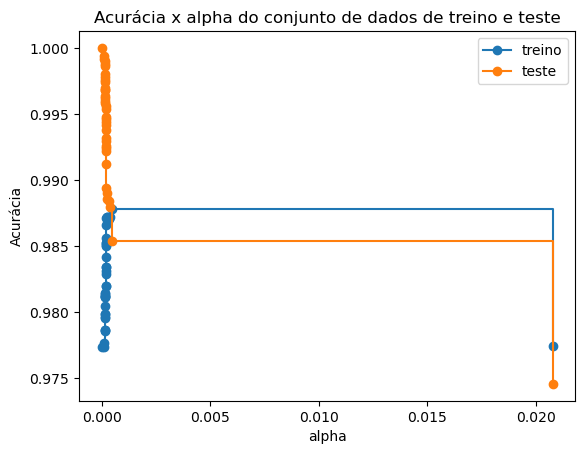

In [30]:
train_scores2 = [clf2.score(X_train, y_train) for clf2 in clfs2]
test_scores2 = [clf2.score(X_test, y_test) for clf2 in clfs2]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores2, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores2, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
#4.Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.
#Use o random_state = 123. Avalie a matriz de classificação.
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf2.fit(X_train,y_train)
predict = clf2.predict(X_test)
accuracy_score(y_test, predict)

#A proporção de proponentes que foram classificados como 'maus' é de 54 como mostrado na matriz de confusão,
# no quadrado que representa os reprovados reais e previstos. 

0.9851851851851852

In [33]:
#5.Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#Usando o método .replace() para alterar todos os “ maus” para “bons”.

y = df.mau.replace(1,0)

In [34]:
#Realizando o treinamento.

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state = 100)

In [35]:
#Calculando a acurácia. 

accuracy_score (y_test, predict)

0.9851851851851852